In [1]:
import cptac
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import statistics

In [2]:
# cptac.download("brca")
# cptac.download("ccrcc")
# cptac.download("colon")
# cptac.download("endometrial")
# cptac.download("gbm")
# cptac.download("luad")
# cptac.download("ovarian")
# cptac.download("hnscc")
# cptac.download("lscc")
brca = cptac.Brca()
ccrcc = cptac.Ccrcc()
colon = cptac.Colon()
en = cptac.Endometrial()
gbm = cptac.Gbm()
luad = cptac.Luad()
ovarian = cptac.Ovarian()
hnscc  = cptac.Hnscc()
lscc = cptac.Lscc()

cptac warning: The GBM dataset is under publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/benkk/anaconda3/envs/cptac_dev/lib/python3.7/site-packages/ipykernel_launcher.py, line 14)


cptac warning: The LUAD dataset is under publication embargo until July 01, 2020. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/benkk/anaconda3/envs/cptac_dev/lib/python3.7/site-packages/ipykernel_launcher.py, line 15)


cptac warning: The HNSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (/Users/benkk/anaconda3/envs/cptac_dev/lib/python3.7/site-packages/ipykernel_launcher.py, line 17)


cptac warning: The LSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (/Users/benkk/anaconda3/envs/cptac_dev/lib/python3.7/site-packages/ipykernel_launcher.py, line 18)


In [30]:
brca_trans = brca.get_transcriptomics()['FUCA1']
ccrcc_trans = ccrcc.get_transcriptomics()['FUCA1']
colon_trans = colon.get_transcriptomics()['FUCA1']
en_trans = en.get_transcriptomics()['FUCA1']
gbm_trans = gbm.get_transcriptomics()['FUCA1']
luad_trans = luad.get_transcriptomics()['FUCA1']
ovarian_trans = ovarian.get_transcriptomics()['FUCA1']
hnscc_trans  = hnscc.get_transcriptomics()['FUCA1']
lscc_trans = lscc.get_transcriptomics()['FUCA1']

brca_prot = brca.get_proteomics()['FUCA1']
ccrcc_prot = ccrcc.get_proteomics()['FUCA1']
colon_prot = colon.get_proteomics()['FUCA1']
en_prot = en.get_proteomics()['FUCA1']
gbm_prot = gbm.get_proteomics()['FUCA1']
luad_prot = luad.get_proteomics()['FUCA1']
ovarian_prot = ovarian.get_proteomics()['FUCA1']
hnscc_prot  = hnscc.get_proteomics()['FUCA1']
lscc_prot = lscc.get_proteomics()['FUCA1']

In [31]:
brca_trans_high = brca.get_transcriptomics()['AKR1B10']
ccrcc_trans_high = ccrcc.get_transcriptomics()['AKR1B10']
colon_trans_high = colon.get_transcriptomics()['AKR1B10']
en_trans_high = en.get_transcriptomics()['AKR1B10']
gbm_trans_high = gbm.get_transcriptomics()['AKR1B10']
luad_trans_high = luad.get_transcriptomics()['AKR1B10']
ovarian_trans_high = ovarian.get_transcriptomics()['AKR1B10']
hnscc_trans_high  = hnscc.get_transcriptomics()['AKR1B10']
lscc_trans_high = lscc.get_transcriptomics()['AKR1B10']

brca_prot_high = brca.get_proteomics()['AKR1B10']
ccrcc_prot_high = ccrcc.get_proteomics()['AKR1B10']
colon_prot_high = colon.get_proteomics()['AKR1B10']
en_prot_high = en.get_proteomics()['AKR1B10']
gbm_prot_high = gbm.get_proteomics()['AKR1B10']
luad_prot_high = luad.get_proteomics()['AKR1B10']
ovarian_prot_high = ovarian.get_proteomics()['AKR1B10']
hnscc_prot_high = hnscc.get_proteomics()['AKR1B10']
lscc_prot_high = lscc.get_proteomics()['AKR1B10']

In [123]:
lscc_prot_high

Database_ID,NP_064695.3
Patient_ID,
C3L-00081,4.2363
C3L-00415,-1.6592
C3L-00445,-7.5113
C3L-00568,4.5885
C3L-00603,-4.1931
...,...
C3N-03886.N,-2.4463
C3N-04124.N,-5.4847
C3N-04127.N,-14.3525


In [49]:
cancer_list = [brca,ccrcc,colon,en,gbm,luad,ovarian,hnscc,lscc]
en_list = [en]

In [134]:
def make_plot(cancers,gene):
    corr_list = []
    pval_list = []
    for tissue in cancers:
        prot = tissue.get_proteomics()
        if isinstance(prot.columns, pd.MultiIndex):
            prot = cptac.utils.reduce_multiindex(prot, levels_to_drop = "Database_ID")

        trans = tissue.get_transcriptomics()
        if isinstance(trans.columns, pd.MultiIndex):
            trans = cptac.utils.reduce_multiindex(trans, levels_to_drop = "Database_ID")
        prot_index_values = list(prot.index.values)
        trans_index_values = list(trans.index.values)
        
        for found_index in prot_index_values:
            if found_index not in trans_index_values:
                prot = prot.drop(index=found_index)
        for found_index in trans_index_values:
            if found_index not in prot_index_values:
                trans = trans.drop(index=found_index)
        nan_indices = set()
        prot_indices = list(prot.index.values)
        trans_indices = list(trans.index.values)   
        prot = prot[gene]
        trans = trans[gene]
        
        for i in range(len(prot)):
            if math.isnan(prot[i]):
                nan_indices.add(prot_indices[i])
                
        for i in range(len(trans)):
            if math.isnan(trans[i]):
                nan_indices.add(trans_indices[i])
        
        nan_indices = list(nan_indices)
        prot = prot.drop(nan_indices)
        trans = trans.drop(nan_indices)
#         print("hi")
#         print(prot)
#         print(trans)
        correlation,pval = scipy.stats.pearsonr(prot, trans)
        corr_list.append(correlation)
        pval_list.append(pval)
    return corr_list,pval_list

In [97]:
my_list,my_list_2 = make_plot(cancer_list,'FUCA1')

cptac warning: Due to dropping the specified levels, dataframe now has 655 duplicated column headers. (/Users/benkk/anaconda3/envs/cptac_dev/lib/python3.7/site-packages/ipykernel_launcher.py, line 7)
cptac warning: Due to dropping the specified levels, dataframe now has 907 duplicated column headers. (/Users/benkk/anaconda3/envs/cptac_dev/lib/python3.7/site-packages/ipykernel_launcher.py, line 7)
cptac warning: Due to dropping the specified levels, dataframe now has 2495 duplicated column headers. (/Users/benkk/anaconda3/envs/cptac_dev/lib/python3.7/site-packages/ipykernel_launcher.py, line 11)
cptac warning: Due to dropping the specified levels, dataframe now has 745 duplicated column headers. (/Users/benkk/anaconda3/envs/cptac_dev/lib/python3.7/site-packages/ipykernel_launcher.py, line 7)
cptac warning: Due to dropping the specified levels, dataframe now has 1162 duplicated column headers. (/Users/benkk/anaconda3/envs/cptac_dev/lib/python3.7/site-packages/ipykernel_launcher.py, line 

In [140]:
my_other_list,my_other_list_2 = make_plot(cancer_list, "AKR1B10")

cptac warning: Due to dropping the specified levels, dataframe now has 655 duplicated column headers. (/Users/benkk/anaconda3/envs/cptac_dev/lib/python3.7/site-packages/ipykernel_launcher.py, line 7)
cptac warning: Due to dropping the specified levels, dataframe now has 907 duplicated column headers. (/Users/benkk/anaconda3/envs/cptac_dev/lib/python3.7/site-packages/ipykernel_launcher.py, line 7)
cptac warning: Due to dropping the specified levels, dataframe now has 2495 duplicated column headers. (/Users/benkk/anaconda3/envs/cptac_dev/lib/python3.7/site-packages/ipykernel_launcher.py, line 11)
cptac warning: Due to dropping the specified levels, dataframe now has 745 duplicated column headers. (/Users/benkk/anaconda3/envs/cptac_dev/lib/python3.7/site-packages/ipykernel_launcher.py, line 7)
cptac warning: Due to dropping the specified levels, dataframe now has 1162 duplicated column headers. (/Users/benkk/anaconda3/envs/cptac_dev/lib/python3.7/site-packages/ipykernel_launcher.py, line 

In [136]:
my_other_list

[0.826170384920793,
 0.33416164891511996,
 0.5941244151378265,
 0.834611803255437,
 0.450662674815847,
 0.6441678081568122,
 -0.09494431413605975,
 0.8949155285056761,
 0.6476874567794901]

In [60]:
my_list

[0.6964457111113764,
 0.44464115429794954,
 0.3829920401880787,
 0.677374923539995,
 0.6515259564413559,
 0.6761254705743079,
 0.7171926298942604,
 0.7841303852419096,
 0.7739082193936365]

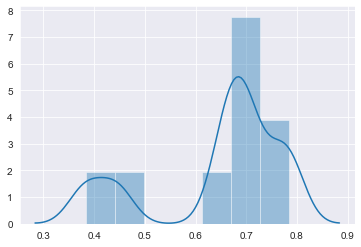

In [61]:
sns.distplot(my_list, label = "BRCA")

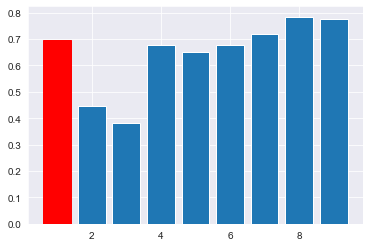

In [62]:
barlist=plt.bar([1,2,3,4,5,6,7,8,9], my_list)
barlist[0].set_color('r')
plt.show()

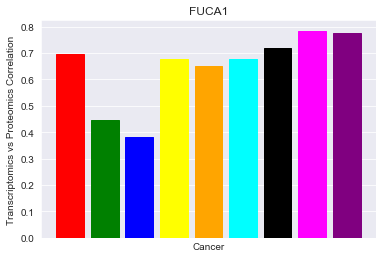

In [144]:
cancer = ["BRCA","CCRCC","COLON","ENDOMETRIAL","GBM","LUAD","OVARIAN"
         "HNSCC","LSCC"]
legend_list = cancer.copy()
pos = [0,1,2,3,4,5,6,7,8]
cancerList = plt.bar(pos, my_list)
# plt.xticks(pos, cancer)
plt.xticks([],[])
# cancerList.axes.get_xaxis().set_visible(False)
plt.xlabel("Cancer")
plt.ylabel("Transcriptomics vs Proteomics Correlation")
# colors = {'BRCA':'red', 'CCRCC':'green', "COLON":"blue", "ENDOMETRIAL":"yellow",
#          "GBM":"orange", "LUAD":"cyan","OVARIAN":"black","HNSCC":"magenta","LSCC":"purple"}         
# labels = list(colors.keys())
# handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
# plt.legend(handles, labels, loc = 1)
cancerList[0].set_color('red')
cancerList[1].set_color('green')
cancerList[2].set_color('blue')
cancerList[3].set_color('yellow')
cancerList[4].set_color('orange')
cancerList[5].set_color('cyan')
cancerList[6].set_color('black')
cancerList[7].set_color('magenta')
cancerList[8].set_color('purple')
plt.title('FUCA1')
plt.show()
# brca_prot_high = brca.get_proteomics()['AKR1B10']
# ccrcc_prot_high = ccrcc.get_proteomics()['AKR1B10']
# colon_prot_high = colon.get_proteomics()['AKR1B10']
# en_prot_high = en.get_proteomics()['AKR1B10']
# gbm_prot_high = gbm.get_proteomics()['AKR1B10']
# luad_prot_high = luad.get_proteomics()['AKR1B10']
# ovarian_prot_high = ovarian.get_proteomics()['AKR1B10']
# hnscc_prot_high = hnscc.get_proteomics()['AKR1B10']
# lscc_prot_high = lscc.get_proteomics()['AKR1B10']

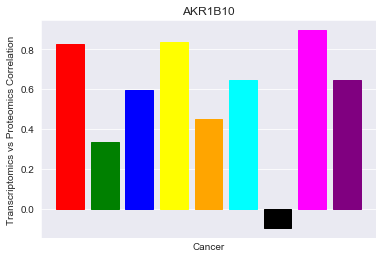

In [143]:
cancer = ["BRCA","CCRCC","COLON","ENDOMETRIAL","GBM","LUAD","OVARIAN"
         "HNSCC","LSCC"]
legend_list = cancer.copy()
pos = [0,1,2,3,4,5,6,7,8]
cancerList = plt.bar(pos, my_other_list)
# plt.xticks(pos, cancer)
plt.xticks([],[])
# cancerList.axes.get_xaxis().set_visible(False)
plt.xlabel("Cancer")
plt.ylabel("Transcriptomics vs Proteomics Correlation")
# colors = {'BRCA':'red', 'CCRCC':'green', "COLON":"blue", "ENDOMETRIAL":"yellow",
#          "GBM":"orange", "LUAD":"cyan","OVARIAN":"black","HNSCC":"magenta","LSCC":"purple"}         
# labels = list(colors.keys())
# handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
# plt.legend(handles, labels, loc = 0)
cancerList[0].set_color('red')
cancerList[1].set_color('green')
cancerList[2].set_color('blue')
cancerList[3].set_color('yellow')
cancerList[4].set_color('orange')
cancerList[5].set_color('cyan')
cancerList[6].set_color('black')
cancerList[7].set_color('magenta')
cancerList[8].set_color('purple')
plt.title("AKR1B10")
plt.show()

In [72]:
legend_list

['BRCA',
 'CCRCC',
 'COLON',
 'ENDOMETRIAL',
 'GBM',
 'LUAD',
 'OVARIANHNSCC',
 'LSCC']

In [53]:
en.get_proteomics()

Name,A1BG,A2M,A2ML1,A4GALT,AAAS,AACS,AADAT,AAED1,AAGAB,AAK1,...,ZSWIM8,ZSWIM9,ZW10,ZWILCH,ZWINT,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
Patient_ID,,,,,,,,,,,,,,,,,,,,,
C3L-00006,-1.1800,-0.8630,-0.802,0.222,0.256000,0.6650,1.2800,-0.3390,0.412,-0.66400,...,-0.08770,NaN,0.0229,0.1090,NaN,-0.33200,-0.43300,-1.020,-0.1230,-0.085900
C3L-00008,-0.6850,-1.0700,-0.684,0.984,0.135000,0.3340,1.3000,0.1390,1.330,-0.36700,...,-0.03560,NaN,0.3630,1.0700,0.737,-0.56400,-0.00461,-1.130,-0.0757,-0.473000
C3L-00032,-0.5280,-1.3200,0.435,NaN,-0.240000,1.0400,-0.0213,-0.0479,0.419,-0.50000,...,0.00112,-0.1450,0.0105,-0.1160,NaN,0.15100,-0.07400,-0.540,0.3200,-0.419000
C3L-00090,-1.6700,-1.1900,-0.443,0.243,-0.099300,0.7570,0.7400,-0.9290,0.229,-0.22300,...,0.07250,-0.0552,-0.0714,0.0933,0.156,-0.39800,-0.07520,-0.797,-0.0301,-0.467000
C3L-00098,-0.3740,-0.0206,-0.537,0.311,0.375000,0.0131,-1.1000,NaN,0.565,-0.10100,...,-0.17600,NaN,-1.2200,-0.5620,0.937,-0.64600,0.20700,-1.850,-0.1760,0.051300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NX5.N,-0.0014,0.6160,-0.641,-0.204,0.027600,-1.4100,-0.4050,-0.5610,-0.373,0.12400,...,0.21500,0.1070,-0.1900,-1.3600,-1.100,-0.19700,-0.30700,0.682,0.0984,-0.020200
NX6.N,0.2980,0.3950,-1.240,-0.178,-0.180000,-0.5910,-0.5980,0.4020,-0.384,0.15200,...,0.05470,0.1980,-0.0139,-0.8080,-0.324,0.16300,-0.14500,0.855,0.1160,-0.000114
NX7.N,0.1110,0.2100,-0.751,-0.335,0.000865,-1.3700,-0.2730,0.1060,-0.717,0.00865,...,0.17600,0.3960,-0.3640,-1.6400,-1.480,0.45300,-0.16800,0.411,-0.1760,0.218000


In [145]:
from sklearn.linear_model import LinearRegression